In [1]:
# https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset
# https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l10c02_nlp_multiple_models_for_predicting_sentiment.ipynb#scrollTo=jzBM1PpJAYfD
import pandas as pd
emails = pd.read_csv('emails.csv')

In [2]:
emails

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [16]:
emails['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

<Axes: xlabel='spam', ylabel='number emails'>

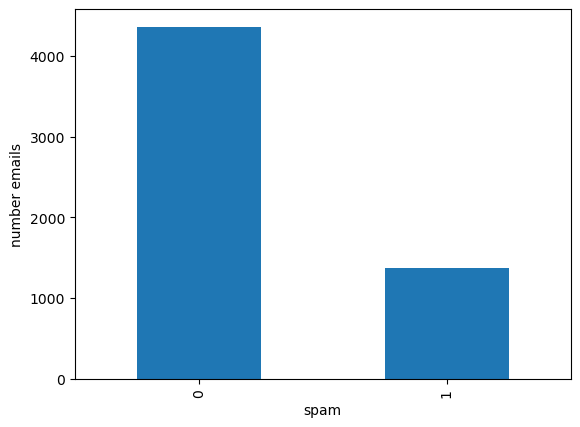

In [25]:
emails['spam'].value_counts().plot.bar(ylabel='number emails', xlabel='spam')
# a little imbalanced but will try models without balancing first

In [27]:
# import packages
import numpy as np
from sklearn.model_selection import train_test_split


  
X= emails['text']
y= emails['spam']
  
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=42, 
                                   test_size=0.25, 
                                   shuffle=True)

In [31]:
X_train

274     Subject: reduction in high blood pressure  age...
4923    Subject: directions to the tamiment resort and...
1361    Subject: avoid fake viagra get the real thing ...
3528    Subject: re :  dave ,  both days .  vince  dav...
1580    Subject: re : eci id for stinson  steve -  cou...
                              ...                        
3772    Subject: john sherriff ' s copper position  te...
5191    Subject: the national forum on corporate finan...
5226    Subject: re : my first draft  quentin ,  i for...
5390    Subject: why johan dahl and the mri energy sta...
860     Subject: perfect visual solution for your busi...
Name: text, Length: 4296, dtype: object

In [29]:
y_train

274     1
4923    0
1361    1
3528    0
1580    0
       ..
3772    0
5191    0
5226    0
5390    0
860     1
Name: spam, Length: 4296, dtype: int64

In [35]:
results = set()
X_train.str.lower().str.split().apply(results.update)
len(results)
# 32755 unique words

32755

In [42]:
vocab_size = 4000
embedding_dim = 16
max_length = 50
trunc_type='post'
pad_type='post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index


In [46]:
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,maxlen=max_length, 
                                truncating=trunc_type, padding=pad_type)

validation_sequences = tokenizer.texts_to_sequences(X_test)
validation_padded = pad_sequences(validation_sequences,maxlen=max_length)

training_labels_final = np.array(y_train)
validation_labels_final = np.array(y_test)

In [48]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),  
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            64000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 64,017
Trainable params: 64,017
Non-trainable params: 0
_________________________________________________________________


In [49]:
num_epochs = 20
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, 
                    validation_data=(validation_padded, validation_labels_final))

Epoch 1/20
135/135 [==============================] - 1s 3ms/step - loss: 0.6154 - accuracy: 0.7647 - val_loss: 0.5693 - val_accuracy: 0.7423
Epoch 2/20
135/135 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.7819 - val_loss: 0.4780 - val_accuracy: 0.7542
Epoch 3/20
135/135 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.8240 - val_loss: 0.4088 - val_accuracy: 0.8038
Epoch 4/20
135/135 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.8848 - val_loss: 0.3561 - val_accuracy: 0.8541
Epoch 5/20
135/135 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9367 - val_loss: 0.3185 - val_accuracy: 0.8876
Epoch 6/20
135/135 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9583 - val_loss: 0.2900 - val_accuracy: 0.9015
Epoch 7/20
135/135 [==============================] - 0s 2ms/step - loss: 0.1438 - accuracy: 0.9679 - val_loss: 0.2672 - val_accuracy: 0.9036
Epoch 

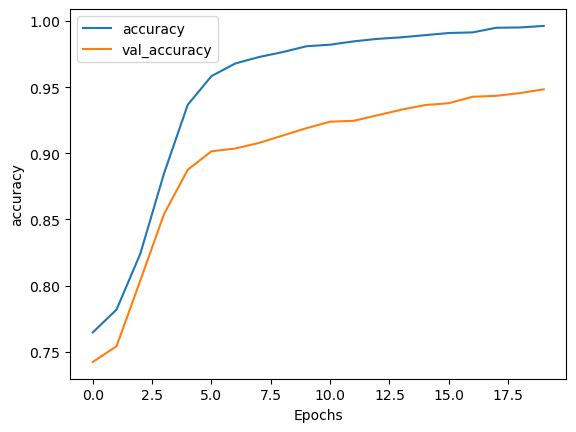

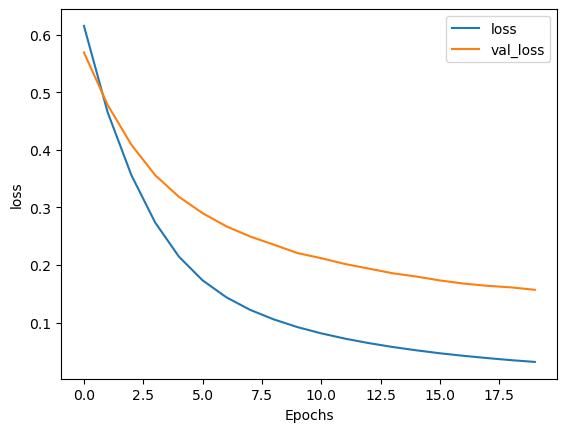

In [50]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [58]:
predicted = np.round(model.predict(validation_padded))
actual = validation_labels_final

45/45 [==============================] - 0s 647us/step


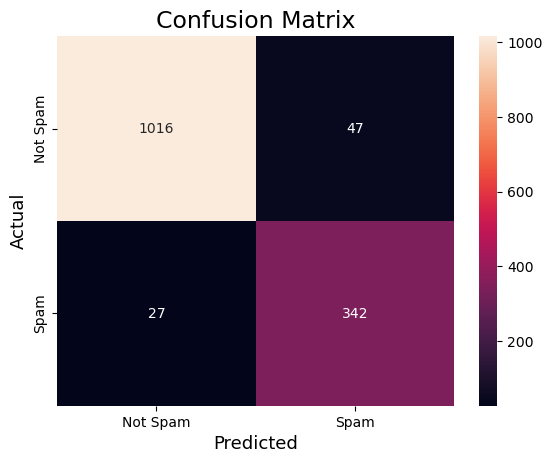

In [67]:
# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(actual,predicted)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Not Spam','Spam'],
            yticklabels=['Not Spam','Spam'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
# more false negatives than false positives, so the model probably doesn't need any class balancing since it's actually
# predicting spam more often than it should!

In [66]:
sum(actual)

369

In [65]:
sum(predicted)

array([389.], dtype=float32)